<a href="https://colab.research.google.com/github/thdgmltjd123/Assignment01/blob/master/Assignment08_20150711.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#구글 드라이브와 코랩 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/data-pca.txt', delimiter=',')

x = data[:,0]
y = data[:,1]

In [73]:
def normalize_data(x,y):
  xn = (x - np.mean(x)) / np.std(x)
  yn = (y - np.mean(y)) / np.std(y)
  return xn, yn

def compute_covariance(xn,yn):
  n = len(xn)
  Z = np.empty((n,2))
  Z[:,0] = xn
  Z[:,1] = yn
  covar = np.dot(Z.T,Z) / n
  return covar

def compute_principal_direction(covariance):
  eigen_val,eigen_vec = np.linalg.eig(covariance)
  direction = eigen_vec
  return direction


In [74]:
xn, yn = normalize_data(x,y)
covar = compute_covariance(xn,yn)
covar

array([[1.     , 0.73553],
       [0.73553, 1.     ]])

In [75]:
eigen_val, eigen_vec = np.linalg.eig(covar)
print(eigen_val)
print(eigen_vec)
eigen_vec.T[0]

[1.73553 0.26447]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


array([0.70710678, 0.70710678])

# **[output] plot the original data points**

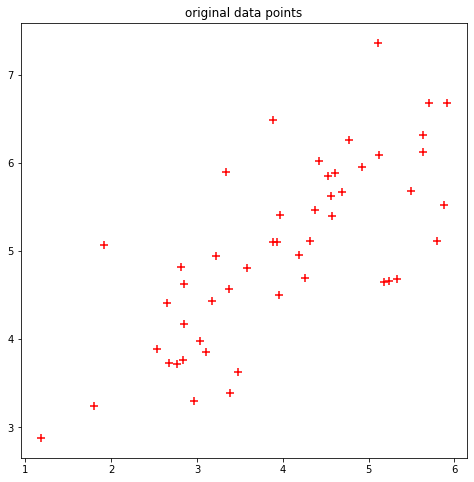

In [76]:
plt.figure(figsize = (8,8))
plt.scatter(x, y , color = "red", marker = '+', s = 80)
plt.title("original data points")
plt.show()

# **[output] plot the normalized data points**

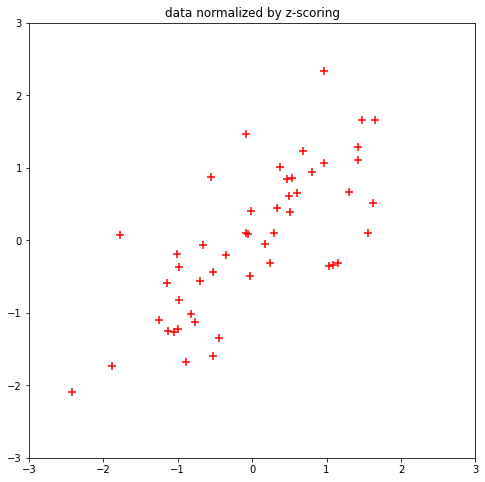

In [77]:
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 80)
plt.title("data normalized by z-scoring")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

# **[output] Plot the principal axes**

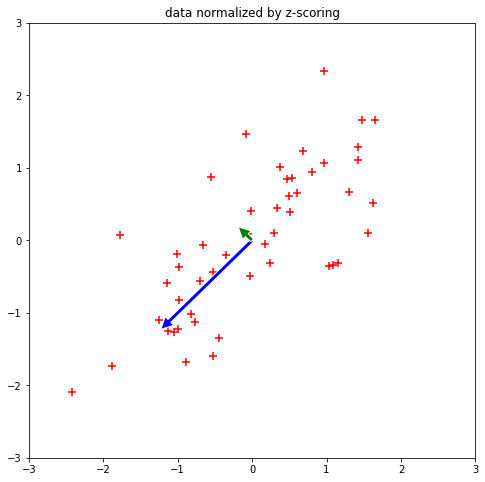

In [86]:
plt.figure(figsize = (8,8))
plt.scatter(xn, yn , color = "red", marker = '+', s = 80)
plt.annotate("",xy = -eigen_val[0] * eigen_vec.T[0], xytext = (0,0), arrowprops = dict(fc = "blue",ec = "white"))
plt.annotate("",xy = eigen_val[1] * eigen_vec.T[1], xytext = (0,0), arrowprops = dict(fc = "green", ec = "white"))
plt.title("data normalized by z-scoring")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()